# Mosquito Sinks and Sources Detection

# Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
transitions = pd.read_csv('data/kernel_regular_5000.csv', header=None)
locations = pd.read_csv('data/stp_all_sites_v3.csv')

# A Peek at the Data

In [3]:
display(transitions.shape, transitions.head())

(509, 509)

,0,1,2,3,4,5,6,7,8,9,...,499,500,501,502,503,504,505,506,507,508
0,0.7980,0.0060,0.0050,0.0035,0.0075,0.0010,0.0030,0.0030,0.0010,0.0010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0060,0.7465,0.0145,0.0120,0.0070,0.0035,0.0035,0.0055,0.0030,0.0050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0050,0.0145,0.7540,0.0160,0.0070,0.0040,0.0045,0.0070,0.0015,0.0035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0035,0.0120,0.0160,0.7705,0.0035,0.0060,0.0035,0.0025,0.0045,0.0035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0075,0.0070,0.0070,0.0035,0.7535,0.0035,0.0040,0.0015,0.0035,0.0060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
transitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Columns: 509 entries, 0 to 508
dtypes: float64(506), int64(3)
memory usage: 2.0 MB


In [5]:
display(locations.shape, locations.head())

(509, 3)

,lon,lat,pop
0,7.42917,1.61930,222
1,7.41421,1.63409,12
2,7.41390,1.63602,8
3,7.41219,1.63492,16
4,7.42591,1.64041,23


In [6]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     509 non-null    float64
 1   lat     509 non-null    float64
 2   pop     509 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 12.1 KB


# The Detector Class - Example Usage

In [7]:
%run Detector.ipynb

In [8]:
d = Detector(transitions, 
             locations,
             b_tol=1e-2,
             s_tol=1e-2,
             ss_vals=10000,
             as_df=True,
             n_clusters=8, 
             random_state=0)

In [9]:
# At what step is the system is steady-state?
d.ss_step

1597

In [10]:
# If we start at time step 0, what happens at steady-state?
d.run()
display(d.clabels().head(),\
        d.results().head()
)

,lon,lat,pop,cid
0,7.42917,1.61930,222,1
1,7.41421,1.63409,12,1
2,7.41390,1.63602,8,1
3,7.41219,1.63492,16,1
4,7.42591,1.64041,23,1


,num_in,num_out,prp_in,prp_out,type,com
0,23278.6,7008.25,0.768604,0.231396,sink,"[96, 98, 99, 100, 101, 102, 103, 104, 105, 106..."
1,3219.57,3219.57,0.5,0.5,bridge,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,3854.16,572.028,0.870763,0.129237,sink,"[89, 416, 432, 433, 434, 435, 436, 437, 438, 4..."
3,11831,10887,0.520778,0.479222,sink,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6..."
4,7574.26,516.691,0.93614,0.0638604,sink,"[299, 402, 403, 404, 405, 406, 407, 408, 409, ..."


In [11]:
# The entries below should not be much different than before
d.run(0, d.ss_step + 1000)
d.results().head()

,num_in,num_out,prp_in,prp_out,type,com
0,23270.9,7009.89,0.768504,0.231496,sink,"[96, 98, 99, 100, 101, 102, 103, 104, 105, 106..."
1,3219.57,3219.57,0.5,0.5,bridge,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,3877.12,567.886,0.872242,0.127758,sink,"[89, 416, 432, 433, 434, 435, 436, 437, 438, 4..."
3,11826.2,10888.1,0.520651,0.479349,sink,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6..."
4,7584.76,514.838,0.936437,0.0635634,sink,"[299, 402, 403, 404, 405, 406, 407, 408, 409, ..."


In [12]:
# What happens if we stop before steady-state?
d.run(0, 100)
d.results().head()

,num_in,num_out,prp_in,prp_out,type,com
0,25232.6,6575.59,0.793274,0.206726,sink,"[96, 98, 99, 100, 101, 102, 103, 104, 105, 106..."
1,3194.64,3194.64,0.5,0.5,bridge,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,1400.11,990.929,0.585566,0.414434,sink,"[89, 416, 432, 433, 434, 435, 436, 437, 438, 4..."
3,9688.88,11205.2,0.463714,0.536286,source,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6..."
4,5001.86,1095.72,0.820302,0.179698,sink,"[299, 402, 403, 404, 405, 406, 407, 408, 409, ..."


In [13]:
# What happens from time step 1000 to steady-state?
d.run(1000)
display(d.clabels().head(),\
        d.results().head()
)

,lon,lat,pop,cid
0,7.42917,1.61930,222,1
1,7.41421,1.63409,12,1
2,7.41390,1.63602,8,1
3,7.41219,1.63492,16,1
4,7.42591,1.64041,23,1


,num_in,num_out,prp_in,prp_out,type,com
0,0,55.8699,0,1,source,"[96, 98, 99, 100, 101, 102, 103, 104, 105, 106..."
1,0.0379719,0.0379719,0.5,0.5,bridge,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,158.247,0,1,0,sink,"[89, 416, 432, 433, 434, 435, 436, 437, 438, 4..."
3,0,27.731,0,1,source,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 6..."
4,70.948,0,1,0,sink,"[299, 402, 403, 404, 405, 406, 407, 408, 409, ..."


# Plots

### First, let's see where the data is geographically:

In [14]:
import folium
import folium.plugins

In [15]:
COORDS = (7.42917, 1.61930)
folimp = folium.Map(locations=COORDS, zoom_start=13)
points = locations[['lat', 'lon']].astype('float').values
heatmp = folium.plugins.HeatMap(points.tolist(), radius=10)
folimp.add_child(heatmp)

In [16]:
cluster = folium.plugins.MarkerCluster()
for _, r in locations[['lat', 'lon']].iterrows():
    cluster.add_child(folium.Marker([float(r['lat']), float(r['lon'])]))
folimp = folium.Map(locations=COORDS, zoom_start=13)
folimp.add_child(cluster)
folimp

In [17]:
# Looks like there are two islands that are independent. Let's split 
# them up, and analyze each individually:
d.run()
cids = d.clabels()
prps = d.results()

principe_locs = cids[cids['lat'] > 1.25]
principe_tmtx = transitions.iloc[principe_locs.index, principe_locs.index]
principe_coms = prps[prps.index.isin(principe_locs['cid'].unique())]

sao_tome_locs = cids[cids['lat'] < 0.50]
sao_tome_tmtx = transitions.iloc[sao_tome_locs.index, sao_tome_locs.index]
sao_tome_coms = prps[prps.index.isin(sao_tome_locs['cid'].unique())]

### Now let's use a graph to visualize the network:

In [18]:
import geojson
from descartes import PolygonPatch

# To plot a background, convert the SHP file(s) to a geojson file
# Use: https://mygeodata.cloud/converter/shp-to-geojson
with open("STP.geojson") as json_file:
    json_data = geojson.load(json_file)

poly = json_data['features']

In [19]:
# Retrieves the polygon coordinates for the background 
principe = { 'type' : 'MultiPolygon', 'coordinates' : poly[0]['geometry']['coordinates'] }
sao_tome = { 'type' : 'MultiPolygon', 'coordinates' : poly[1]['geometry']['coordinates'] }
all_data = { 'type' : 'MultiPolygon', 'coordinates' : poly[0]['geometry']['coordinates'][:] }
all_data['coordinates'].extend(poly[1]['geometry']['coordinates'][:])

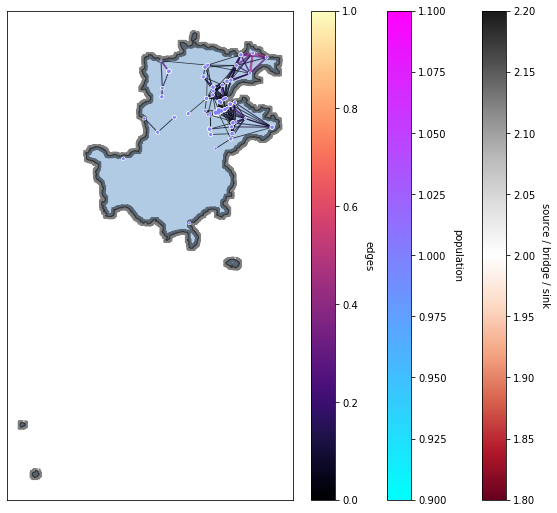

In [20]:
plot_data(principe_tmtx, principe_locs, principe_coms,\
          nodes_fn=lambda x: x**(1/3),
          bordr_mu=3,
          min_prob=0.007,
          edges_mu=100,
          bgrd_crd=principe,
          bgbd_lwd=5,
          fig_size=(10,9),
          plt_bbar=True,
          plt_pbar=True,
          plt_sbar=True
)

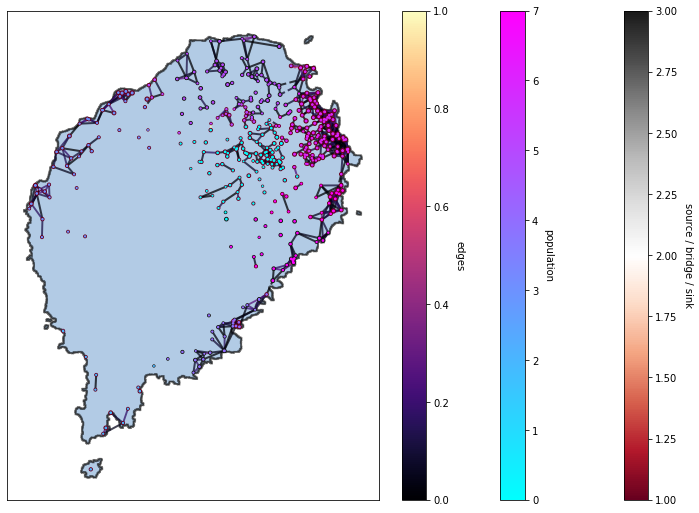

In [21]:
plot_data(sao_tome_tmtx, sao_tome_locs, sao_tome_coms,\
          nodes_fn=lambda x: x**(1/6),
          bordr_mu=5,
          edges_fn=np.log10,
          min_prob=0.009,
          edges_mu=1,
          bgrd_crd=sao_tome,
          bgbd_lwd=2,
          fig_size=(13,9),
          plt_bbar=True,
          plt_pbar=True,
          plt_sbar=True,
)

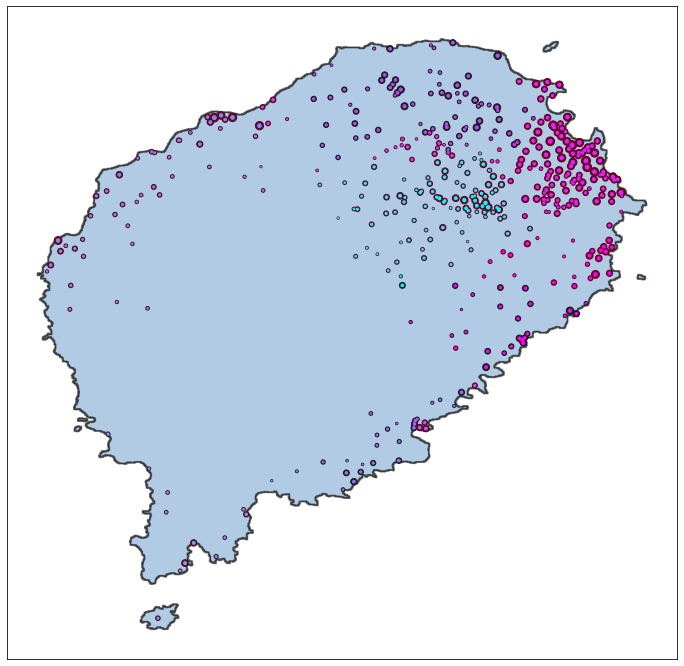

In [22]:
plot_data(sao_tome_tmtx, sao_tome_locs, sao_tome_coms,\
          nodes_fn=lambda x: x**(1/3),
          bordr_mu=5,
          edges_fn=np.log10,
          min_prob=1,
          edges_mu=1,
          bgrd_crd=sao_tome,
          bgbd_lwd=2,
          fig_size=(12,12)
)

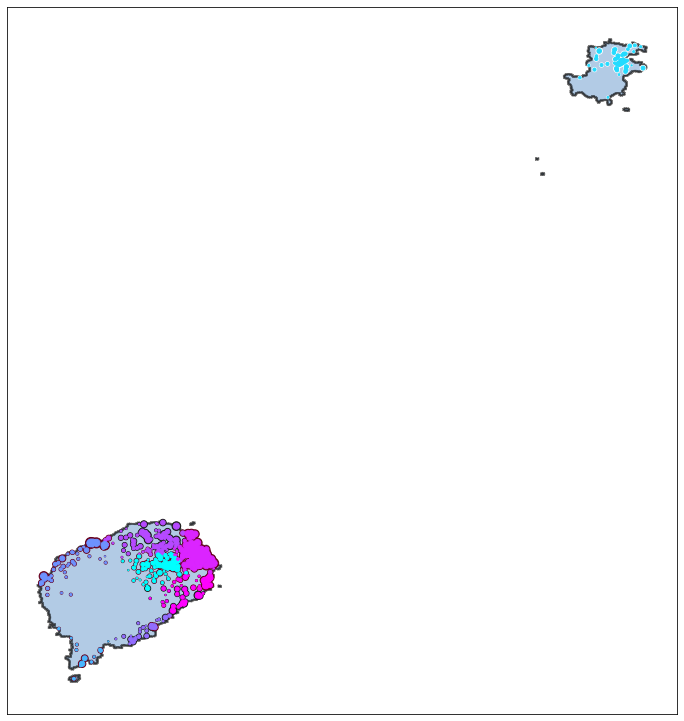

In [23]:
plot_data(transitions, d.clabels(), d.results(),\
          nodes_fn=np.sqrt,
          bordr_mu=2,
          edges_fn=np.log10,
          min_prob=1,
          edges_mu=2,
          bgrd_crd=all_data,
          bgbd_lwd=2,
          fig_size=(12,13),
 )

# References

1. Polygon Plotting: https://gis.stackexchange.com/questions/93136/how-to-plot-geo-data-using-matplotlib-python/93201#93201

2. SHP file: https://data.humdata.org/dataset/sao-tome-and-principe-administrative-boundaries

3. Colormaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html